In [86]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [87]:
df = pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_North',skiprows=4))
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])
df = df.groupby(by=["index_time"], dropna=False).mean()

print(df.columns)

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [88]:
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]

data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_26336\2237089100.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ip

In [89]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

year = 2021
df = df.loc[df.index.year == year]
data_actual = data_actual.loc[data_actual.index.year == year]


In [90]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

In [91]:
for i in name_list:
    print(i)
    print('Acutal Gen MWh = ',np.round(data_actual[i].sum(),4))
    print('ERA5 Gen MWh = ',np.round(df[i].sum(),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal Gen MWh =  1173.9591
ERA5 Gen MWh =  1450.2079
Diff from actual percen  =  23.5

EAN-N[R4_EAN-N(MW)]
Acutal Gen MWh =  1455.3736
ERA5 Gen MWh =  1491.187
Diff from actual percen  =  2.5

NED-N[R1_NED-N(MW)]
Acutal Gen MWh =  1439.2438
ERA5 Gen MWh =  1484.9616
Diff from actual percen  =  3.2

SSP-N[R1_SSP-N(MW)]
Acutal Gen MWh =  1581.749
ERA5 Gen MWh =  1484.9616
Diff from actual percen  =  -6.1

EAL-N[R4_EAL-N(MW)]
Acutal Gen MWh =  1606.8892
ERA5 Gen MWh =  1440.2002
Diff from actual percen  =  -10.4

EAP-N[R4_EAP-N(MW)]
Acutal Gen MWh =  1683.7033
ERA5 Gen MWh =  1480.046
Diff from actual percen  =  -12.1



In [92]:
gen_difffromactual = pd.DataFrame()
for i in name_list:
    gen_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()) for j in range(12)]
    gen_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()) for j in range(12)]
    gen_difffromactual_list = [(gen_era5_month_list[j] - gen_actual_month_list[j]) for j in range(12)]
    gen_difffromactual[i] = pd.DataFrame(gen_difffromactual_list)
print('Diff from actual MWh  = \n',np.round(gen_difffromactual,1))

Diff from actual MWh  = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    39.7                 12.0                 16.3   
1                    30.4                 11.9                 22.7   
2                    31.2                 19.9                 16.7   
3                    28.2                  7.3                  7.4   
4                    18.9                  5.5                  0.3   
5                    -1.5                 -6.3                -16.3   
6                     9.1                 -2.4                 -3.7   
7                    35.4                 -1.1                  4.4   
8                    19.7                -10.5                 -8.5   
9                    13.0                  1.5                  0.7   
10                    8.2                  2.1                 -1.7   
11                   44.0                 -4.0                  7.5   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-

In [93]:
for i in name_list:
    print(i)
    print('Acutal PF = ',np.round(data_actual[i].sum() * 100 /len(data_actual),4))
    print('ERA5 PF = ',np.round(df[i].sum() * 100 /len(df),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal PF =  13.4014
ERA5 PF =  16.5549
Diff from actual percen  =  23.5

EAN-N[R4_EAN-N(MW)]
Acutal PF =  16.6139
ERA5 PF =  17.0227
Diff from actual percen  =  2.5

NED-N[R1_NED-N(MW)]
Acutal PF =  16.4297
ERA5 PF =  16.9516
Diff from actual percen  =  3.2

SSP-N[R1_SSP-N(MW)]
Acutal PF =  18.0565
ERA5 PF =  16.9516
Diff from actual percen  =  -6.1

EAL-N[R4_EAL-N(MW)]
Acutal PF =  18.3435
ERA5 PF =  16.4406
Diff from actual percen  =  -10.4

EAP-N[R4_EAP-N(MW)]
Acutal PF =  19.2204
ERA5 PF =  16.8955
Diff from actual percen  =  -12.1



In [94]:
plantfactor_actual_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_actual_monthly[i] = pd.DataFrame(pf_month_list)

print("pf actual (%) = \n",np.round(plantfactor_actual_monthly*100,1))

pf actual (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    14.0                 18.4                 17.8   
1                    15.6                 18.8                 17.4   
2                    15.4                 17.1                 17.5   
3                    13.3                 16.5                 16.0   
4                    15.2                 17.7                 18.2   
5                    15.3                 15.9                 17.6   
6                    13.1                 15.2                 15.4   
7                    10.4                 16.1                 15.4   
8                     9.5                 14.2                 13.9   
9                    12.8                 14.2                 14.6   
10                   14.3                 16.6                 16.2   
11                   12.0                 18.7                 17.2   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP

In [95]:
plantfactor_era5_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_era5_monthly[i] = pd.DataFrame(pf_month_list)

print("pf era5 (%) = \n",np.round(plantfactor_era5_monthly*100,1))

pf era5 (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    19.3                 20.0                 20.0   
1                    20.1                 20.5                 20.8   
2                    19.6                 19.8                 19.7   
3                    17.2                 17.5                 17.0   
4                    17.7                 18.4                 18.3   
5                    15.1                 15.1                 15.3   
6                    14.4                 14.9                 14.9   
7                    15.2                 15.9                 16.0   
8                    12.3                 12.8                 12.7   
9                    14.6                 14.4                 14.7   
10                   15.4                 16.9                 16.0   
11                   17.9                 18.2                 18.2   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N

In [96]:
plantfactor_difffromactual = pd.DataFrame()
for i in name_list:
    pf_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    pf_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]
    plantfactor_difffromactual[i] = pd.DataFrame(pf_difffromactual_list)
print("pf era5 diff from actual (%) = \n",np.round(plantfactor_difffromactual*100,1))

pf era5 diff from actual (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    38.0                  8.8                 12.3   
1                    28.9                  9.4                 19.5   
2                    27.3                 15.6                 12.8   
3                    29.4                  6.1                  6.4   
4                    16.7                  4.1                  0.2   
5                    -1.4                 -5.5                -12.9   
6                     9.3                 -2.1                 -3.2   
7                    45.6                 -0.9                  3.8   
8                    28.7                -10.3                 -8.5   
9                    13.6                  1.5                  0.6   
10                    8.0                  1.7                 -1.5   
11                   49.2                 -2.9                  5.8   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)

Measure, time series similarity

In [97]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

EAN-N[R4_EAN-N(MW)]


<Axes: xlabel='time_utcadj'>

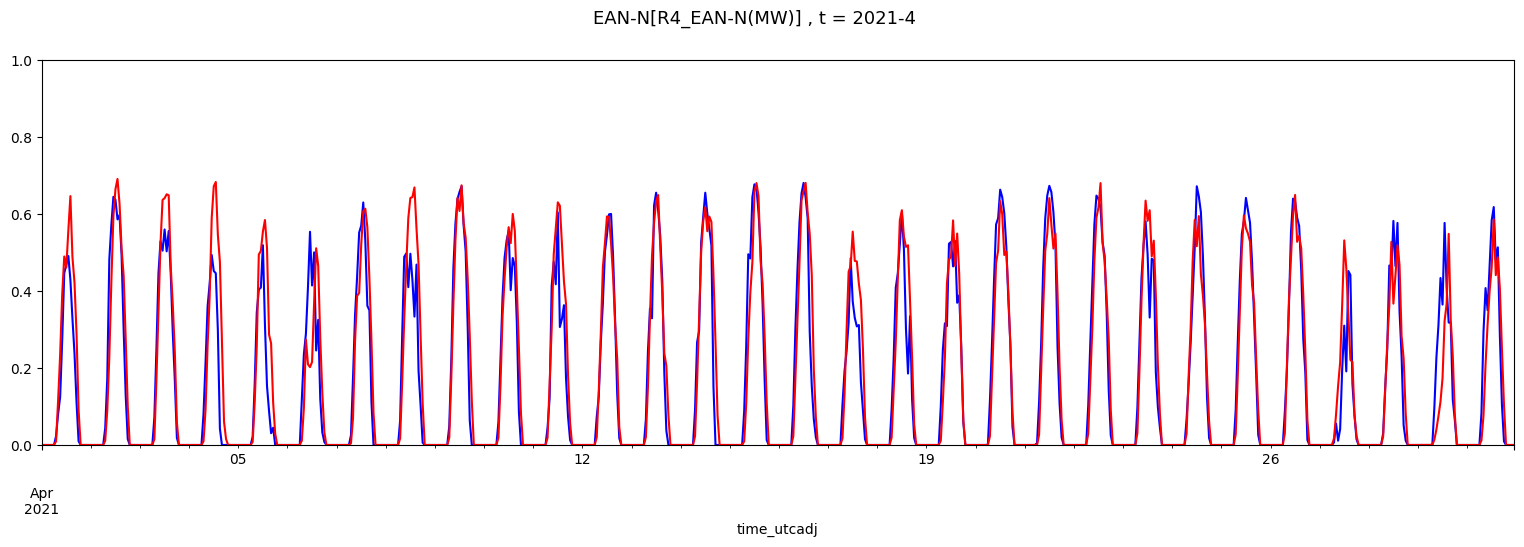

In [98]:
name_index = 1
month = 4
t = str(year) + '-' + str(month)
print(name_list[name_index])

fig, ax = plt.subplots(figsize=(19,5))
fig.suptitle(name_list[name_index] + ' , t = '+ t , fontsize=13)
# data_actual[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
# df[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
data_actual[name_list[name_index]].loc[t].plot(ax = ax,color = 'blue', ylim = (0,1))
df[name_list[name_index]].loc[t].plot(ax = ax,color = 'red', ylim = (0,1))


In [99]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.round(np.sqrt(np.sum((actual - predic) ** 2)),3)

def calc_mae(actual, predic):
    return np.round(np.mean(np.abs((actual - predic))),3)


print(" year ======   ",year)
print("                   ")
for name_index in range(len(name_list)):
    ts = pd.DataFrame()
    ts['actual'] = data_actual[name_list[name_index]]
    ts['era5'] = df[name_list[name_index]]
    print(name_list[name_index])
    ## Pearson Correlation ##   
    print('plant = ', name_list[name_index])
    print("          ")
    print("     correalation     ")
    print(ts.loc[ts['actual'] > 0].corr())
    print("          ")
    print('calc_euclidean',calc_euclidean(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print('calc_mae = ',calc_mae(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print("     ")


 year ======    2021
                   
BCPG-N[MCC_BCP-N(MW)]
plant =  BCPG-N[MCC_BCP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.833659
era5    0.833659  1.000000
          
calc_euclidean 7.917
calc_mae =  0.094
     
EAN-N[R4_EAN-N(MW)]
plant =  EAN-N[R4_EAN-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.847969
era5    0.847969  1.000000
          
calc_euclidean 7.831
calc_mae =  0.092
     
NED-N[R1_NED-N(MW)]
plant =  NED-N[R1_NED-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.815328
era5    0.815328  1.000000
          
calc_euclidean 8.668
calc_mae =  0.101
     
SSP-N[R1_SSP-N(MW)]
plant =  SSP-N[R1_SSP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.840233
era5    0.840233  1.000000
          
calc_euclidean 9.634
calc_mae =  0.113
     
EAL-N[R4_EAL-N(MW)]
plant =  EAL-N[R4_EAL-N(MW)]
          
     correalati